In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import numpy as np

In [2]:
Psy_df = pd.read_csv('Youtube01-Psy.csv')

In [3]:
Psy_df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [4]:
Psy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
COMMENT_ID    350 non-null object
AUTHOR        350 non-null object
DATE          350 non-null object
CONTENT       350 non-null object
CLASS         350 non-null int64
dtypes: int64(1), object(4)
memory usage: 8.2+ KB


In [5]:
Psy_df['CONTENT LENGTH'] = Psy_df['CONTENT'].apply(len)

In [6]:
Psy_df.groupby('CLASS').describe()

CONTENT LENGTH                                                         
               count        mean         std   min   25%   50%    75%     max
CLASS                                                                        
0              175.0   69.085714   67.765727   4.0  31.0  54.0   91.5   753.0
1              175.0  104.685714  126.933998  14.0  41.5  64.0  115.5  1078.0

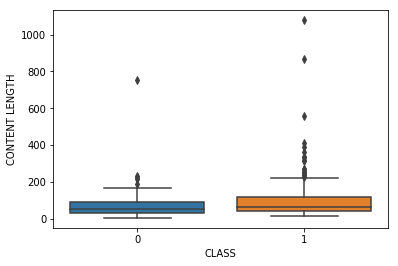

In [7]:
sns.boxplot(x = 'CLASS', y = 'CONTENT LENGTH', data = Psy_df)

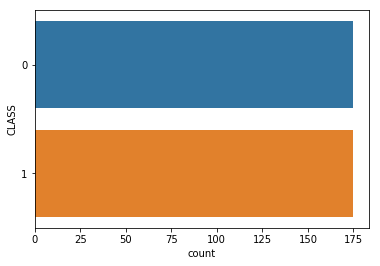

In [8]:
sns.countplot(y = 'CLASS', data = Psy_df)

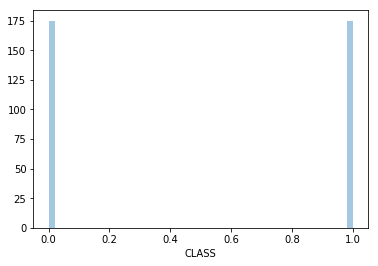

In [9]:
sns.distplot(Psy_df['CLASS'], kde = False, bins = 50)

In [10]:
def text_process(content):
    nopunc = [char for char in content if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
cv = CountVectorizer(analyzer= text_process).fit(Psy_df['CONTENT'])

In [13]:
bow = cv.transform(Psy_df['CONTENT'])

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer

In [15]:
tfidf = TfidfTransformer().fit(bow)

In [16]:
tfidf.transform(bow)

<350x1459 sparse matrix of type '<class 'numpy.float64'>'
	with 2671 stored elements in Compressed Sparse Row format>

In [17]:
from sklearn.model_selection import train_test_split

In [94]:
Psy_X = Psy_df['CONTENT']
Psy_y = Psy_df.CLASS

In [95]:
Psy_X_train, Psy_X_test, Psy_y_train, Psy_y_test = train_test_split( Psy_X, Psy_y, test_size=0.3, random_state=99)

In [96]:
from sklearn.naive_bayes import MultinomialNB

In [97]:
from sklearn.pipeline import Pipeline

In [98]:
pipeine = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('Classifier', MultinomialNB()),
])

In [100]:
pipeine.fit(Psy_X_train, Psy_y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x12CF3978>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
...f=False, use_idf=True)), ('Classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [101]:
Psy_predictions = pipeine.predict(Psy_X_test)

In [102]:
from sklearn.metrics import classification_report, confusion_matrix

In [103]:
print('Predictions of Psy DATA')
print('Printing Confusion Matrix \n', confusion_matrix(Psy_predictions, Psy_y_test))
print('\n Printing Classification Matrix\n',classification_report(predictions, Psy_y_test))

Predictions of Psy DATA
Printing Confusion Matrix 
 [[46 10]
 [ 2 47]]

 Printing Classification Matrix
               precision    recall  f1-score   support

           0       0.96      0.82      0.88        56
           1       0.82      0.96      0.89        49

   micro avg       0.89      0.89      0.89       105
   macro avg       0.89      0.89      0.89       105
weighted avg       0.90      0.89      0.89       105



In [104]:
KP_df = pd.read_csv('Youtube02-KatyPerry.csv')
LMFAO_df = pd.read_csv('Youtube03-LMFAO.csv')
Eminem_df = pd.read_csv('Youtube04-Eminem.csv')
shakira_df = pd.read_csv('Youtube05-Shakira.csv')

In [329]:
KP_X = KP_df['CONTENT']
KP_y = KP_df['CLASS']
KP_X_train, KP_X_test, KP_y_train, KP_y_test = train_test_split( KP_X, KP_y, test_size=0.3, random_state=9)
pipeine.fit(KP_X_train, KP_y_train)
KP_predictions = pipeine.predict(KP_X_test)
print('Predictions of Katty Perry DATA')
print('Printing Confusion Matrix \n', confusion_matrix(KP_predictions, KP_y_test))
print('\n Printing Classification Matrix\n',classification_report(KP_predictions, KP_y_test))

Predictions of Katty Perry DATA
Printing Confusion Matrix 
 [[47  4]
 [ 8 46]]

 Printing Classification Matrix
               precision    recall  f1-score   support

           0       0.85      0.92      0.89        51
           1       0.92      0.85      0.88        54

   micro avg       0.89      0.89      0.89       105
   macro avg       0.89      0.89      0.89       105
weighted avg       0.89      0.89      0.89       105



In [106]:
LMFAO_X = LMFAO_df['CONTENT']
LMFAO_y = LMFAO_df['CLASS']
LMFAO_X_train, LMFAO_X_test, LMFAO_y_train, LMFAO_y_test = train_test_split( LMFAO_X, LMFAO_y, test_size=0.3, random_state=1)
pipeine.fit(LMFAO_X_train, LMFAO_y_train)
LMFAO_predictions = pipeine.predict(LMFAO_X_test)
print('Predictions of LMFAO DATA')
print('Printing Confusion Matrix \n', confusion_matrix(LMFAO_predictions, LMFAO_y_test))
print('\n Printing Classification Matrix\n',classification_report(LMFAO_predictions, LMFAO_y_test))

Predictions of LMFAO DATA
Printing Confusion Matrix 
 [[44  4]
 [15 69]]

 Printing Classification Matrix
               precision    recall  f1-score   support

           0       0.75      0.92      0.82        48
           1       0.95      0.82      0.88        84

   micro avg       0.86      0.86      0.86       132
   macro avg       0.85      0.87      0.85       132
weighted avg       0.87      0.86      0.86       132



In [107]:
Eminem_X = Eminem_df['CONTENT']
Eminem_y = Eminem_df['CLASS']
Eminem_X_train, Eminem_X_test, Eminem_y_train, Eminem_y_test = train_test_split( Eminem_X, Eminem_y, test_size=0.3, random_state=99)
pipeine.fit(Eminem_X_train, Eminem_y_train)
Eminem_predictions = pipeine.predict(Eminem_X_test)
print('Predictions of Emienem DATA')
print('Printing Confusion Matrix \n', confusion_matrix(Eminem_predictions, Eminem_y_test))
print('\n Printing Classification Matrix\n',classification_report(Eminem_predictions, Eminem_y_test))

Predictions of Emienem DATA
Printing Confusion Matrix 
 [[38  2]
 [17 78]]

 Printing Classification Matrix
               precision    recall  f1-score   support

           0       0.69      0.95      0.80        40
           1       0.97      0.82      0.89        95

   micro avg       0.86      0.86      0.86       135
   macro avg       0.83      0.89      0.85       135
weighted avg       0.89      0.86      0.86       135



In [108]:
shakira_X = shakira_df['CONTENT']
shakira_y = shakira_df['CLASS']
shakira_X_train, shakira_X_test, shakira_y_train, shakira_y_test = train_test_split( shakira_X, shakira_y, test_size=0.3, random_state=99)
pipeine.fit(shakira_X_train, shakira_y_train)
shakira_predictions = pipeine.predict(shakira_X_test)
print('Predictions of Shakira DATA')
print('Printing Confusion Matrix \n', confusion_matrix(shakira_predictions, shakira_y_test))
print('\n Printing Classification Matrix\n',classification_report(shakira_predictions, shakira_y_test))

Predictions of Shakira DATA
Printing Confusion Matrix 
 [[62  9]
 [ 2 38]]

 Printing Classification Matrix
               precision    recall  f1-score   support

           0       0.97      0.87      0.92        71
           1       0.81      0.95      0.87        40

   micro avg       0.90      0.90      0.90       111
   macro avg       0.89      0.91      0.90       111
weighted avg       0.91      0.90      0.90       111



In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [109]:
KP_mse = mean_squared_error(KP_predictions, KP_y_test)
Eminem_mse = mean_squared_error(Eminem_predictions, Eminem_y_test)
shakira_mse = mean_squared_error(shakira_predictions, shakira_y_test)
LMFAO_mse = mean_squared_error(LMFAO_predictions, LMFAO_y_test)
Psy_mse = mean_squared_error(Psy_predictions, Psy_y_test)

In [143]:
acc_list = [KP_mse, Eminem_mse, shakira_mse, LMFAO_mse, Psy_mse]
artist_name= ['Katty Perry', 'Eminem', 'Shakira', 'LMFAO', 'Psy']

In [168]:
acc_per = [100-num*100 for num in acc_list]

In [301]:
acc_df = pd.DataFrame({'Name of the Artist': artist_name,
                      'Acuraacy of predection': acc_per} )

In [331]:
acc_df.head()

,Name of the Artist,Acuraacy of predection
0,Katty Perry,82.857143
1,Eminem,85.925926
2,Shakira,90.090090
3,LMFAO,85.606061
4,Psy,88.571429


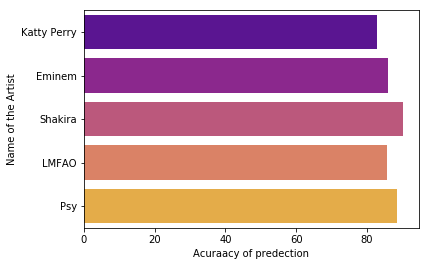

In [330]:
sns.barplot(y = 'Name of the Artist', x = 'Acuraacy of predection', data=acc_df, palette= 'plasma', saturation=0.75)